In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os


df = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\Sprint 12\Projeto\dados\trending_by_time.csv")
print(df.head())


   record_id  region               trending_date    category_title  \
0          1  France  2017-11-14 00:00:00.000000  Autos & Vehicles   
1          2  France  2017-11-15 00:00:00.000000  Autos & Vehicles   
2          3  France  2017-11-16 00:00:00.000000  Autos & Vehicles   
3          4  France  2017-11-17 00:00:00.000000  Autos & Vehicles   
4          5  France  2017-11-18 00:00:00.000000  Autos & Vehicles   

   videos_count  
0             8  
1             2  
2             6  
3             8  
4             4  


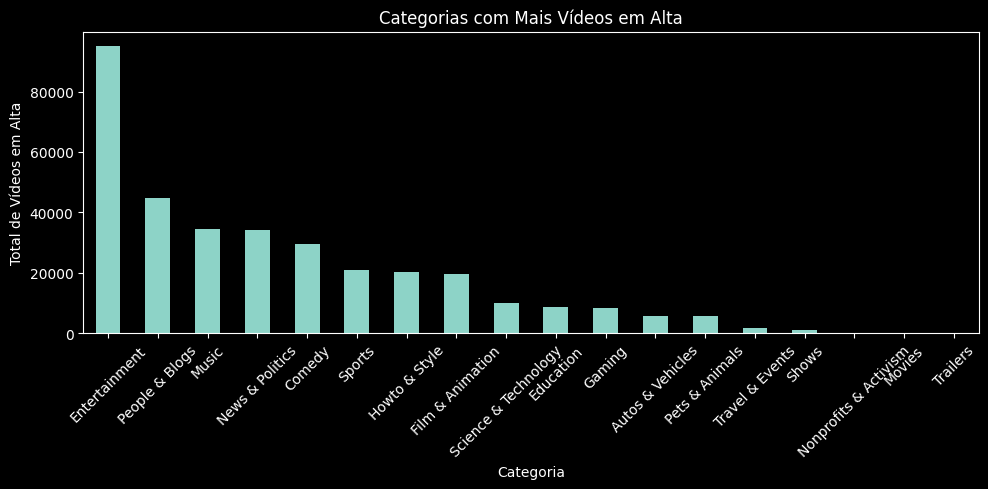

In [30]:
# Garante que o diretório "gráficos" exista
os.makedirs('gráficos', exist_ok=True)

# Soma total de vídeos em alta por categoria
contagem = df.groupby('category_title')['videos_count'].sum().sort_values(ascending=False)

# Gráfico com fundo preto
plt.style.use('dark_background')
contagem.plot(kind='bar', figsize=(10, 5))

plt.title('Categorias com Mais Vídeos em Alta')
plt.xlabel('Categoria')
plt.ylabel('Total de Vídeos em Alta')
plt.xticks(rotation=45)

plt.tight_layout()

# Salva o gráfico em PNG
plt.savefig('gráficos/categorias_em_alta.png', dpi=300)

# Mostra o gráfico (opcional)
plt.show()

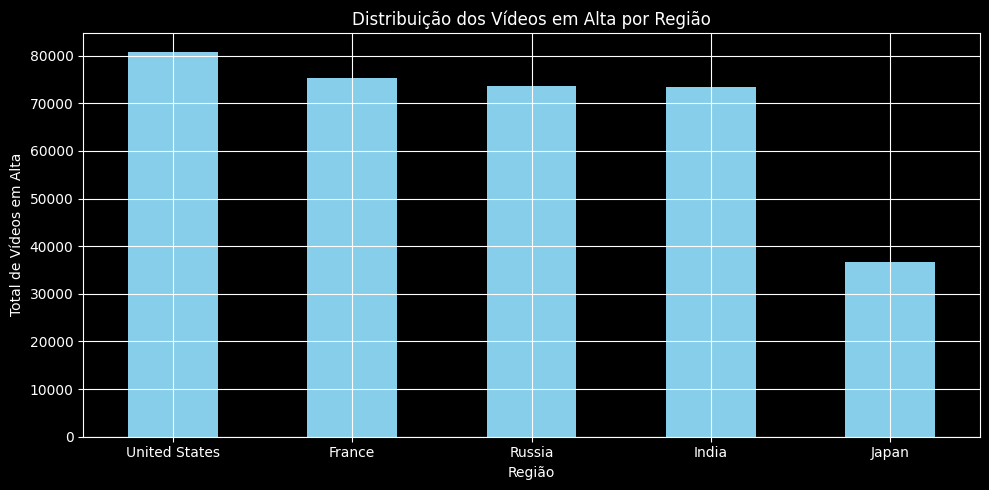

In [31]:

# Soma dos vídeos em alta por região
contagem = df.groupby('region')['videos_count'].sum().sort_values(ascending=False)

# Gráfico com fundo preto
plt.style.use('dark_background')
contagem.plot(kind='bar', figsize=(10, 5), color='skyblue')

plt.title('Distribuição dos Vídeos em Alta por Região')
plt.xlabel('Região')
plt.ylabel('Total de Vídeos em Alta')
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.savefig('gráficos/Distribuição', dpi=300)

plt.show()


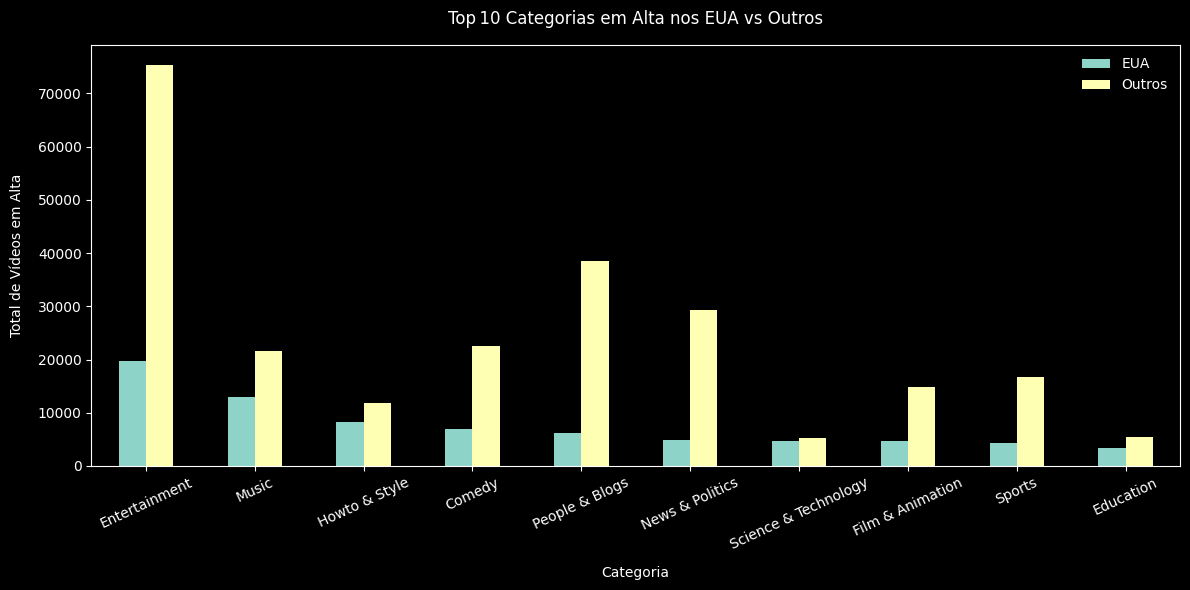

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Soma vídeos em alta por categoria nos EUA e fora dos EUA
soma_eua    = df[df['region'] == 'United States'].groupby('category_title')['videos_count'].sum()
soma_outros = df[df['region'] != 'United States'].groupby('category_title')['videos_count'].sum()

# DataFrame comparativo e seleção das top 10 categorias pelos EUA
comp = pd.concat([soma_eua, soma_outros], axis=1, keys=['EUA', 'Outros']).fillna(0)
comp = comp.sort_values('EUA', ascending=False).head(10)

# Plot multi-bar com tema preto
plt.style.use('dark_background')
ax = comp.plot(kind='bar', figsize=(12, 6))

ax.set_title('Top 10 Categorias em Alta nos EUA vs Outros', pad=15, color='white')
ax.set_xlabel('Categoria', labelpad=10, color='white')
ax.set_ylabel('Total de Vídeos em Alta', labelpad=10, color='white')
ax.legend(['EUA', 'Outros'], frameon=False, loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
ax.tick_params(axis='x', rotation=25, labelcolor='white')
ax.tick_params(axis='y', labelcolor='white')

plt.savefig('gráficos/EUA.png', dpi=400, bbox_inches='tight')
plt.tight_layout()
plt.show()
